# Initiation

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Import Training Data

## Data from the original contest

In [3]:
df_train = pd.read_csv("train.csv")
df_train.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

Save training results seperately

In [4]:
df_train_result = df_train[['target', 'standard_error']].copy()
df_train_result.head()

,target,standard_error
0,-0.340259,0.464009
1,-0.315372,0.480805
2,-0.580118,0.476676
3,-1.054013,0.450007
4,0.247197,0.510845


Drop url, licese, and the training results

In [5]:
# URL and license are mostly empty we can intuitively know they won't have any siginificance
# We want to focus on the texts only

df_train = df_train.drop(['url_legal', 'license', 'target', 'standard_error'], axis=1)
df_train.head()

,id,excerpt
0,c12129c31,When the young people returned to the ballroom...
1,85aa80a4c,"All through dinner time, Mrs. Fayre was somewh..."
2,b69ac6792,"As Roger had predicted, the snow departed as q..."
3,dd1000b26,And outside before the palace a great garden w...
4,37c1b32fb,Once upon a time there were Three Bears who li...


### Analysis of Targets from original dataset

In [20]:
print("--- Distribution of Target Values ---\n")
print(df_train_result["target"].describe())

--- Distribution of Target Values ---

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64


Visualization of the target values

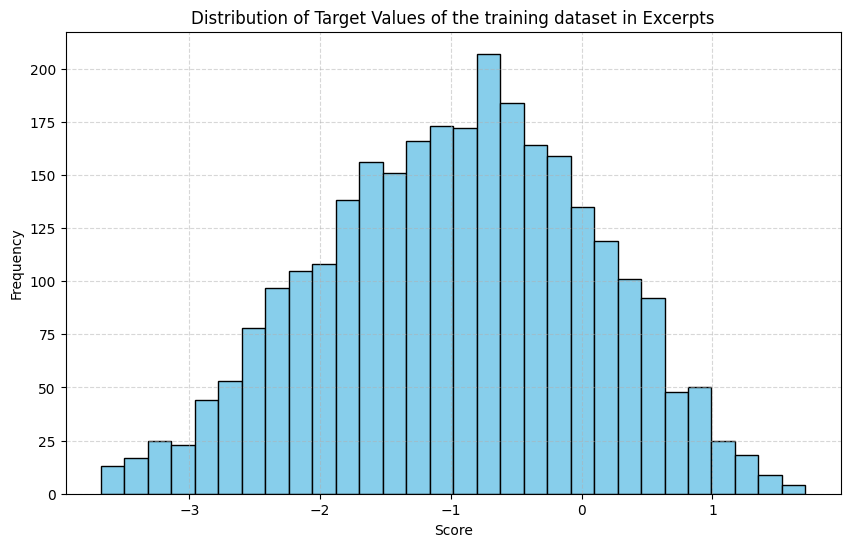

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df_train_result["target"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Values of the training dataset in Excerpts')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Dataset from CLEAR

In [27]:
# Read
CLEAR_df = pd.read_csv('CLEAR.csv')
CLEAR_df.columns

Index(['ID', 'Last Changed', 'Author', 'Title', 'Anthology', 'URL', 'Source',
       'Pub Year', 'Category', 'Location', 'License', 'MPAA\nMax',
       'MPAA \n#Max', 'MPAA\n#Avg', 'Excerpt', 'Google\nWC', 'Joon\nWC v1',
       'British WC', 'British Words', 'Sentence\nCount v1',
       'Sentence\nCount v2', 'Paragraphs', 'BT Easiness', 'BT s.e.',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI', 'firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred',
       'Kaggle split'],
      dtype='object')

In [28]:
# Drop columns and store the result columns seperately
CLEAR_df = CLEAR_df.rename(columns={'ID': 'id', 'Excerpt': 'excerpt', 'BT Easiness': 'target', 'BT s.e.': 'standard_error'})
CLEAR_df_result = CLEAR_df[['target', 'standard_error']].copy()
CLEAR_df_result.tail()

,target,standard_error
4721,0.310336,0.508939
4722,-0.215279,0.514128
4723,0.300779,0.512379
4724,NaN,NaN
4725,NaN,NaN


Extract the ids and texts

In [29]:
CLEAR_df = CLEAR_df[['id', 'excerpt']]
CLEAR_df.head()

,id,excerpt
0,400.0,When the young people returned to the ballroom...
1,401.0,"All through dinner time, Mrs. Fayre was somewh..."
2,402.0,"As Roger had predicted, the snow departed as q..."
3,403.0,Mr. Grimes was to come up next morning to Sir ...
4,404.0,And outside before the palace a great garden w...


### Analysis of Targets from CLEAR corpus

In [30]:
print("--- Distribution of Target Values ---\n")
print(CLEAR_df_result["target"].describe())

--- Distribution of Target Values ---

count    4724.000000
mean       -0.957639
std         1.033656
min        -3.676268
25%        -1.696555
50%        -0.909094
75%        -0.203428
max         1.711390
Name: target, dtype: float64


Visualization of target values

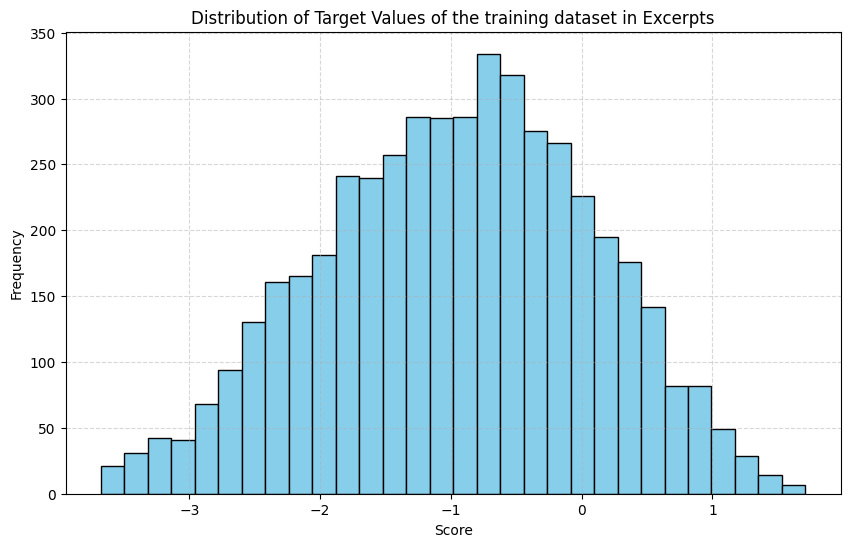

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(CLEAR_df_result["target"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Values of the training dataset in Excerpts')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Concactenate datasets

## Merge datasets

In [13]:
concat_df_list = [df_train, CLEAR_df]

# Concatenate along rows and reset index
consolidated_df = pd.concat(concat_df_list, axis=0, ignore_index=True)

# Convert the 'id' column to string
consolidated_df['id'] = consolidated_df['id'].astype(str)

# Drop none types
consolidated_df = consolidated_df.dropna()
# Drop duplicates
consolidated_df = consolidated_df.drop_duplicates()

# View the last few rows
consolidated_df.tail()

,id,excerpt
7553,8027.0,The name Monarch means “king”. An adult Monarc...
7554,8028.0,"Walking Sticks are long, thin, and slow-moving..."
7555,8029.0,A Black Widow is a shiny black spider. It has ...
7556,8030.0,Solids are shapes that you can actually touch....
7557,8031.0,Animals are made of many cells. They eat thing...


General analysis of the data

In [14]:
text_length = consolidated_df['excerpt'].apply(lambda x: len(x.split(' ')))
print(f'--- Distribution of the Total Data Text Length ---\n')
print(text_length.describe())

--- Distribution of the Total Data Text Length ---

count    7558.000000
mean      171.840963
std        16.992603
min       125.000000
25%       158.000000
50%       173.000000
75%       186.000000
max       205.000000
Name: excerpt, dtype: float64


Plot of the distribution

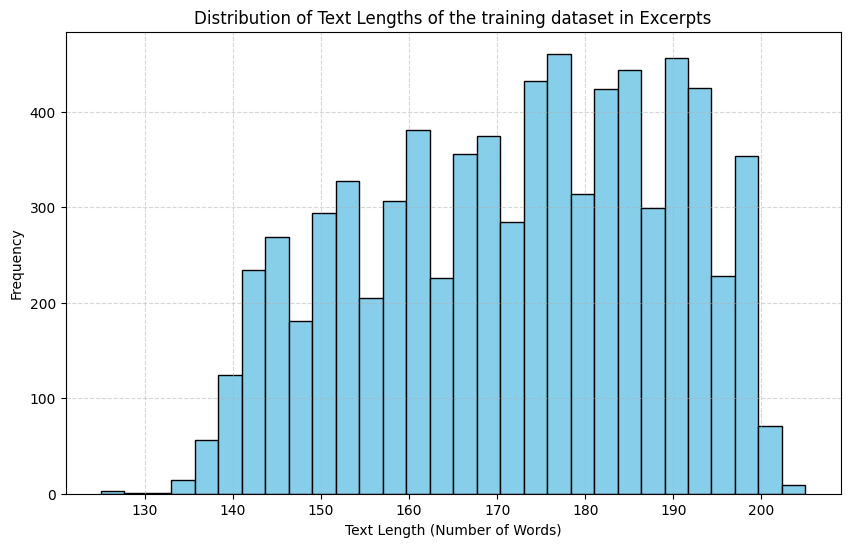

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths of the training dataset in Excerpts')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Merge Targets

Since the target datasets have a similar distribution and are both calculated using Bradley–Terry ease of readability score, we can directly concactenate them together.

In [33]:
concat_df_list_target = [df_train_result, CLEAR_df_result]

# Concatenate along rows and reset index
consolidated_df_target = pd.concat(concat_df_list_target, axis=0, ignore_index=True)

# Drop none types
consolidated_df_target = consolidated_df_target.dropna()
# Drop duplicates
consolidated_df_target = consolidated_df_target.drop_duplicates()

# View the last few rows
consolidated_df_target.tail()

,target,standard_error
7546,1.270244,0.581614
7550,0.650829,0.544809
7553,0.423388,0.511439
7554,-0.614142,0.475506
7555,0.310336,0.508939


# Import Testing Data

In [ ]:
df_test = pd.read_csv("test.csv")
df_test.columns

Drop url and license columns

In [ ]:
# Same as for the training dataset drop the insignificant columns

df_test = df_test.drop(['url_legal', 'license'], axis = 1)
df_test.head()

Analysis and plot of the data

In [ ]:
text_length_test = df_test['excerpt'].apply(lambda x: len(x.split(' ')))
print(f'--- Distribution of the Total Data Text Length ---\n')
print(text_length_test.describe())

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(text_length_test, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths of the testing dataset in Excerpts')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Random Forest Trial

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume 'target' is the column we're trying to predict
y = df_train_result['target']
X = df_train

# Split into train and test sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse